# Import necessries Libraries

In [1]:
import warnings
from math import sqrt

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import tensorflow as tf

# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")


print(tf.__version__)

2.4.1


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
import calendar


In [3]:
#ML Algorithms

import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import plot_importance, plot_tree

from sklearn.metrics import r2_score

In [4]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from IPython.display import display

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [6]:
#Artificial Neural Networks(ANNs):Keras Libraries

 #Building ANN As a Regressor
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend


# Data Preprocessing

* Part 1; for Train Data

In [7]:
train_data = pd.read_csv('/kaggle/input/bd-air-quality/Train Dataset (Updated).csv', parse_dates=['time'])
train_data.set_index('time', inplace=True)

In [8]:
train_data.columns = train_data.columns.str.replace('Station_mean_raw_PM2.5', 'target')


In [9]:
#Feature extraction from time for train data

train_data['time'] = train_data.index

train_data['dayofweek'] = train_data['time'].dt.dayofweek

train_data['month'] = train_data['time'].dt.month

train_data['quarter'] = train_data['time'].dt.quarter

train_data['year'] = train_data['time'].dt.year
train_data['dayofyear'] = train_data['time'].dt.dayofyear
train_data['dayofmonth'] = train_data['time'].dt.day
train_data['weekofyear'] = train_data['time'].dt.weekofyear

In [10]:
train=train_data.drop('time',axis=1)

In [11]:
train.head()

,mean_MYD08_D3_6_1_Deep_Blue_Aerosol_Optical_Depth_550_Land_Mean,target,Average Temperature,Rain Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,dayofweek,month,quarter,year,dayofyear,dayofmonth,weekofyear
time,,,,,,,,,,,,,,,
2017-01-01,0.600190,231.5,20.5,0.0,6.9,1.2,16.3,73.17,6,1,1,2017,1,1,52
2017-01-03,0.482987,181.9,21.4,0.0,9.2,1.7,14.4,69.74,1,1,1,2017,3,3,1
2017-01-04,0.433491,127.7,20.8,0.0,11.4,2.0,0.2,67.64,2,1,1,2017,4,4,1
2017-01-05,0.404293,206.8,19.6,0.0,10.3,1.2,20.0,79.39,3,1,1,2017,5,5,1
2017-01-07,0.276455,227.1,18.9,0.0,8.1,1.3,28.2,73.95,5,1,1,2017,7,7,1


In [12]:
#train.to_csv('final_train_data.csv')

1. Part 2; for test Data

In [13]:
test_data = pd.read_csv('/kaggle/input/bd-air-quality/Test Dataset (Updated).csv', parse_dates=['time'])
test_data.set_index('time', inplace=True)

In [14]:
test_data.columns = test_data.columns.str.replace('Station_mean_raw_PM2.5', 'target')


In [15]:
#Feature extraction from time for test data

test_data['time'] = test_data.index

test_data['dayofweek'] = test_data['time'].dt.dayofweek

test_data['month'] = test_data['time'].dt.month

test_data['quarter'] = test_data['time'].dt.quarter

test_data['year'] = test_data['time'].dt.year
test_data['dayofyear'] = test_data['time'].dt.dayofyear
test_data['dayofmonth'] = test_data['time'].dt.day
test_data['weekofyear'] = test_data['time'].dt.weekofyear

In [16]:
test=test_data.drop('time',axis=1)

In [17]:
test.head()

,mean_MYD08_D3_6_1_Deep_Blue_Aerosol_Optical_Depth_550_Land_Mean,target,Average Temperature,Rain Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,dayofweek,month,quarter,year,dayofyear,dayofmonth,weekofyear
time,,,,,,,,,,,,,,,
2017-01-02,0.418893,209.6,20.9,0.0,6.9,1.4,16.8,72.88,0,1,1,2017,2,2,1
2017-01-06,0.315074,227.4,19.1,0.0,11.4,1.0,13.2,80.34,4,1,1,2017,6,6,1
2017-01-09,0.457947,199.9,20.5,0.0,11.4,2.0,0.0,64.03,0,1,1,2017,9,9,2
2017-01-12,0.614742,141.9,19.9,0.0,11.4,1.8,4.3,62.76,3,1,1,2017,12,12,2
2017-01-16,0.402805,172.4,18.7,0.0,10.5,1.9,0.0,61.80,0,1,1,2017,16,16,3


In [18]:
#test.to_csv('final_test_data.csv')

# Exploratory data analysis(EDA), Data Visualization 

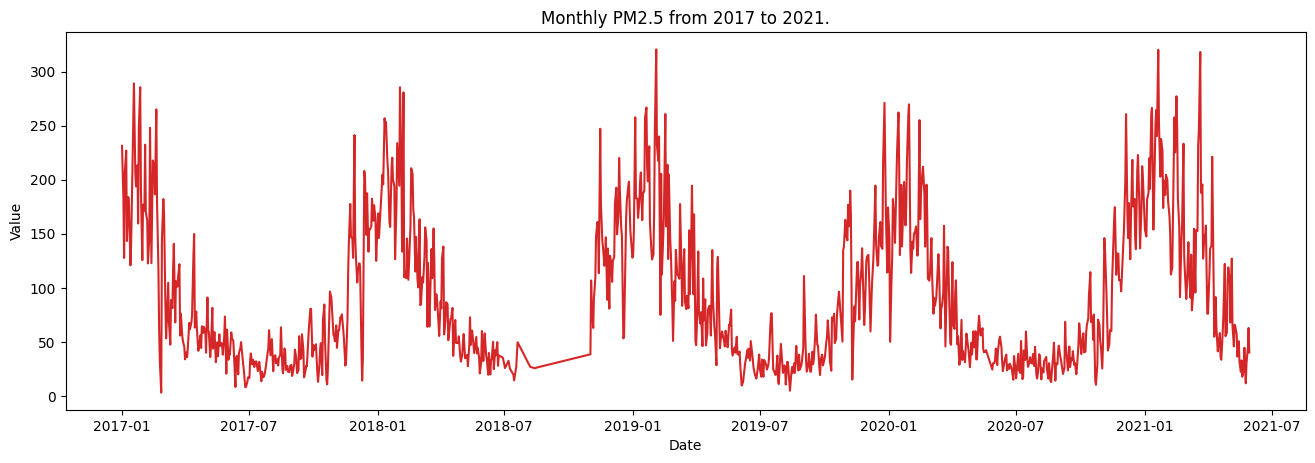

In [19]:
#for train data

# Drawing Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(train, x=train.index, y=train.target, title='Monthly PM2.5 from 2017 to 2021.')

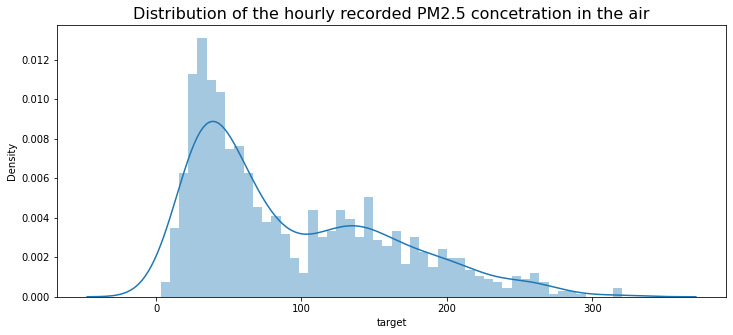

In [20]:
plt.figure(figsize=(12,5))
sns.distplot(train['target'],bins=50)
plt.title('Distribution of the hourly recorded PM2.5 concetration in the air',
          fontsize=16)
plt.show()

In [21]:
train.columns

Index([' mean_MYD08_D3_6_1_Deep_Blue_Aerosol_Optical_Depth_550_Land_Mean',
       'target', 'Average Temperature', 'Rain Precipitation', 'Wind Speed',
       'Visibility', 'Cloud Cover', 'Relative Humidity', 'dayofweek', 'month',
       'quarter', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [22]:
train = train.loc[:,~train.columns.duplicated()]

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1033 entries, 2017-01-01 to 2021-05-30
Data columns (total 15 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0    mean_MYD08_D3_6_1_Deep_Blue_Aerosol_Optical_Depth_550_Land_Mean  1033 non-null   float64
 1   target                                                            1033 non-null   float64
 2   Average Temperature                                               1033 non-null   float64
 3   Rain Precipitation                                                1033 non-null   float64
 4   Wind Speed                                                        1033 non-null   float64
 5   Visibility                                                        1033 non-null   float64
 6   Cloud Cover                                                       1033 non-null   float64
 7   Relative Humidi

In [24]:
train.describe()

,mean_MYD08_D3_6_1_Deep_Blue_Aerosol_Optical_Depth_550_Land_Mean,target,Average Temperature,Rain Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,dayofweek,month,quarter,year,dayofyear,dayofmonth,weekofyear
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.00000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,0.573113,93.263698,26.240077,9.859313,11.582188,2.307938,45.595547,71.36635,3.008712,6.040658,2.349468,2018.781220,168.267183,15.545983,24.492740
std,0.398005,67.424997,3.998178,22.465699,8.236264,0.397978,29.438476,8.82565,2.010371,3.534478,1.134741,1.326005,107.983222,8.768561,15.469468
min,0.048922,3.100000,12.800000,0.000000,3.300000,0.500000,0.000000,43.72000,0.000000,1.000000,1.000000,2017.000000,1.000000,1.000000,1.000000
25%,0.305220,37.300000,23.200000,0.000000,8.100000,2.200000,17.300000,65.64000,1.000000,3.000000,1.000000,2018.000000,75.000000,8.000000,11.000000
50%,0.477867,68.400000,27.400000,0.000000,10.300000,2.500000,50.000000,71.27000,3.000000,5.000000,2.000000,2019.000000,152.000000,15.000000,22.000000
75%,0.717756,141.600000,29.500000,9.270000,13.900000,2.600000,71.600000,77.56000,5.000000,9.000000,3.000000,2020.000000,263.000000,23.000000,38.000000
max,2.959325,320.800000,33.000000,207.060000,152.100000,2.800000,96.400000,94.07000,6.000000,12.000000,4.000000,2021.000000,366.000000,31.000000,53.000000


In [25]:
train.shape

(1033, 15)

In [26]:
train.target.value_counts()

38.2     6
33.9     5
64.0     5
43.8     5
32.5     4
        ..
138.4    1
122.1    1
222.3    1
182.4    1
64.1     1
Name: target, Length: 783, dtype: int64

In [27]:
train.apply(lambda x: sum(x.isnull()),axis=0)

 mean_MYD08_D3_6_1_Deep_Blue_Aerosol_Optical_Depth_550_Land_Mean    0
target                                                              0
Average Temperature                                                 0
Rain Precipitation                                                  0
Wind Speed                                                          0
Visibility                                                          0
Cloud Cover                                                         0
Relative Humidity                                                   0
dayofweek                                                           0
month                                                               0
quarter                                                             0
year                                                                0
dayofyear                                                           0
dayofmonth                                                          0
weekofyear          

<AxesSubplot:>

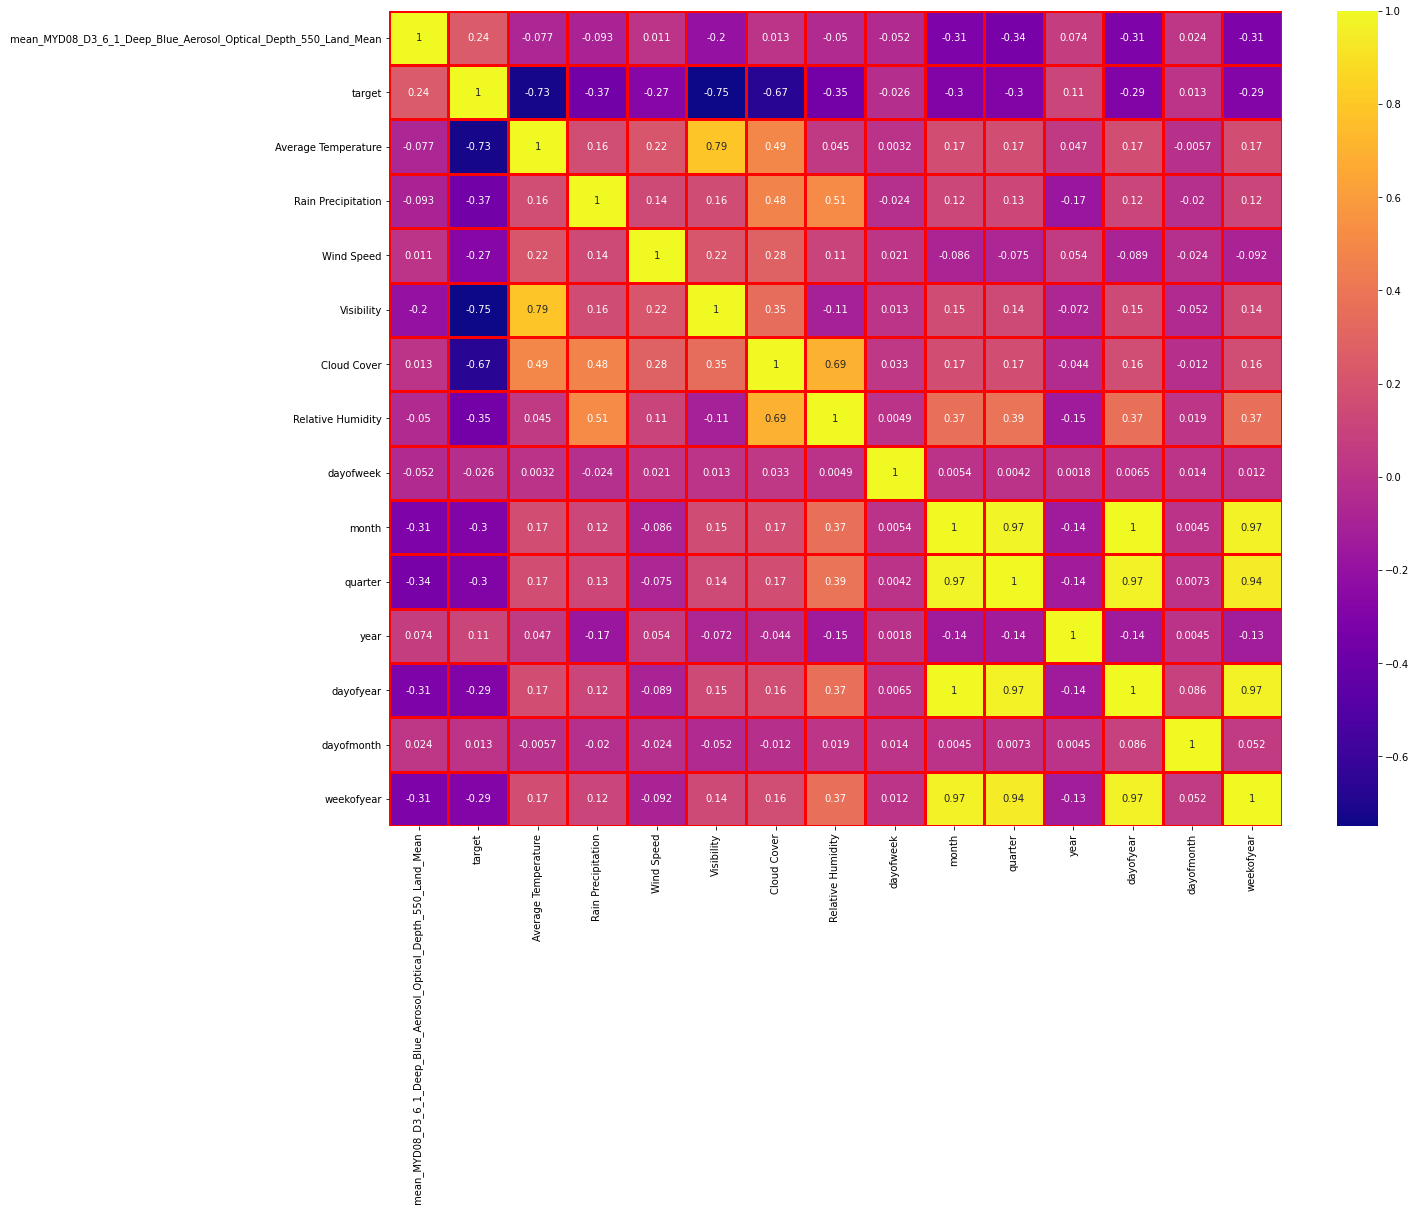

In [28]:
#CM

plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),annot=True,linecolor='red',linewidths=3,cmap = 'plasma')

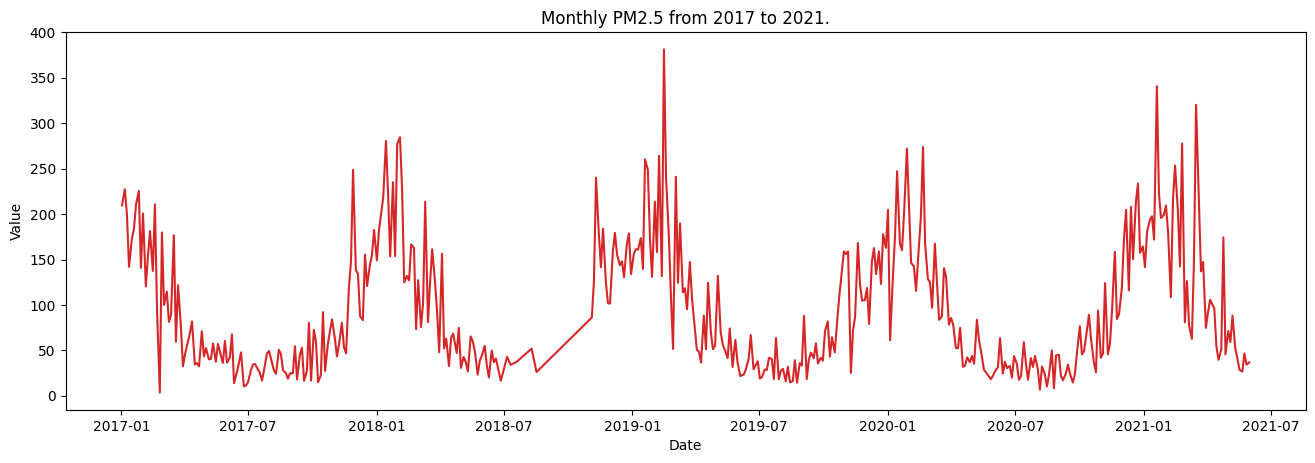

In [29]:
#for test data

#for train data

# Drawing Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(test, x=test.index, y=test.target, title='Monthly PM2.5 from 2017 to 2021.')

# Feature selection

In [30]:
X_train = train.drop('target',axis=1)

y_train = train['target']

In [31]:
X_test = test.drop('target',axis=1)

y_test = test['target']

In [32]:
X_train

,mean_MYD08_D3_6_1_Deep_Blue_Aerosol_Optical_Depth_550_Land_Mean,Average Temperature,Rain Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,dayofweek,month,quarter,year,dayofyear,dayofmonth,weekofyear
time,,,,,,,,,,,,,,
2017-01-01,0.600190,20.5,0.0,6.9,1.2,16.3,73.17,6,1,1,2017,1,1,52
2017-01-03,0.482987,21.4,0.0,9.2,1.7,14.4,69.74,1,1,1,2017,3,3,1
2017-01-04,0.433491,20.8,0.0,11.4,2.0,0.2,67.64,2,1,1,2017,4,4,1
2017-01-05,0.404293,19.6,0.0,10.3,1.2,20.0,79.39,3,1,1,2017,5,5,1
2017-01-07,0.276455,18.9,0.0,8.1,1.3,28.2,73.95,5,1,1,2017,7,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,0.168688,29.7,0.0,11.4,2.5,90.0,76.53,1,5,2,2021,145,25,21
2021-05-26,0.201215,27.8,0.0,16.1,2.5,91.8,77.86,2,5,2,2021,146,26,21
2021-05-28,0.464704,30.1,0.0,15.0,2.5,79.3,71.78,4,5,2,2021,148,28,21


In [33]:
y_train

time
2017-01-01    231.5
2017-01-03    181.9
2017-01-04    127.7
2017-01-05    206.8
2017-01-07    227.1
              ...  
2021-05-25     11.7
2021-05-26     30.3
2021-05-28     44.6
2021-05-29     62.9
2021-05-30     40.2
Name: target, Length: 1033, dtype: float64

In [34]:
X_test

,mean_MYD08_D3_6_1_Deep_Blue_Aerosol_Optical_Depth_550_Land_Mean,Average Temperature,Rain Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,dayofweek,month,quarter,year,dayofyear,dayofmonth,weekofyear
time,,,,,,,,,,,,,,
2017-01-02,0.418893,20.9,0.0,6.9,1.4,16.8,72.88,0,1,1,2017,2,2,1
2017-01-06,0.315074,19.1,0.0,11.4,1.0,13.2,80.34,4,1,1,2017,6,6,1
2017-01-09,0.457947,20.5,0.0,11.4,2.0,0.0,64.03,0,1,1,2017,9,9,2
2017-01-12,0.614742,19.9,0.0,11.4,1.8,4.3,62.76,3,1,1,2017,12,12,2
2017-01-16,0.402805,18.7,0.0,10.5,1.9,0.0,61.80,0,1,1,2017,16,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17,2.079394,30.6,0.0,11.4,2.5,60.7,66.06,0,5,2,2021,137,17,20
2021-05-21,0.242252,31.6,0.0,13.9,2.5,32.8,63.37,4,5,2,2021,141,21,20
2021-05-24,0.306044,32.5,0.0,18.3,2.5,73.2,65.18,0,5,2,2021,144,24,21


In [35]:
y_test

time
2017-01-02    209.6
2017-01-06    227.4
2017-01-09    199.9
2017-01-12    141.9
2017-01-16    172.4
              ...  
2021-05-17     28.7
2021-05-21     26.6
2021-05-24     46.6
2021-05-27     34.3
2021-05-31     36.8
Name: target, Length: 443, dtype: float64

# Algorithm; Artificial Neural Networks(ANNs) part

In [36]:
#Defining Root Mean Square Error As our Metric Function 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [37]:
# Initialising the Artificial Neural Networks(ANNs)
model_nn = Sequential()

# Adding the input layer and the first hidden layer
model_nn.add(Dense(32, activation = 'relu', input_dim = 14))
model_nn.add(BatchNormalization())
# Adding the second hidden layer
model_nn.add(Dense(units = 64, activation = 'relu'))
model_nn.add(BatchNormalization())
# Adding the third hidden layer
model_nn.add(Dense(units = 128, activation = 'relu'))
model_nn.add(BatchNormalization())

# Adding the output layer
model_nn.add(Dense(units = 1))

# Optimize , Compile And Train The Model 
opt =keras.optimizers.Adam(lr=0.003)
#print(model_nn.summary())
model_nn.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])

In [38]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [39]:
import tensorflow as tf
checkpoint_filepath ='best.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_rmse',
    mode='min',
    save_best_only=True)

In [40]:
# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history=model_nn.fit(sc.fit_transform(X_train),y_train,
                     epochs = 30 ,
                     batch_size=32,
                     validation_data=(sc.transform(X_test), y_test),
                     callbacks=[model_checkpoint_callback])

Epoch 1/30
33/33 [==============================] - 2s 26ms/step - loss: 12807.4899 - rmse: 93.5325 - val_loss: 10963.7402 - val_rmse: 86.5825
Epoch 2/30
33/33 [==============================] - 0s 7ms/step - loss: 9815.8948 - rmse: 88.6989 - val_loss: 8664.2490 - val_rmse: 81.7415
Epoch 3/30
33/33 [==============================] - 0s 7ms/step - loss: 8546.6158 - rmse: 84.7788 - val_loss: 7014.7188 - val_rmse: 76.6336
Epoch 4/30
33/33 [==============================] - 0s 7ms/step - loss: 6138.4065 - rmse: 72.7646 - val_loss: 4973.4312 - val_rmse: 63.1959
Epoch 5/30
33/33 [==============================] - 0s 7ms/step - loss: 4489.1858 - rmse: 60.6748 - val_loss: 3351.7378 - val_rmse: 48.6348
Epoch 6/30
33/33 [==============================] - 0s 7ms/step - loss: 3838.1948 - rmse: 55.1867 - val_loss: 2326.0554 - val_rmse: 36.6589
Epoch 7/30
33/33 [==============================] - 0s 7ms/step - loss: 2278.9614 - rmse: 40.1489 - val_loss: 1518.0704 - val_rmse: 26.3704
Epoch 8/30
33/33 

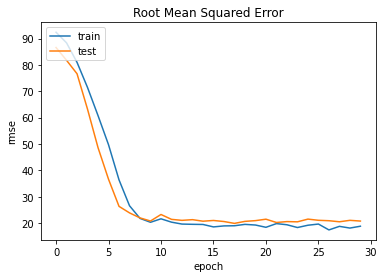

In [41]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Root Mean Squared Error is:  30.66331835765577


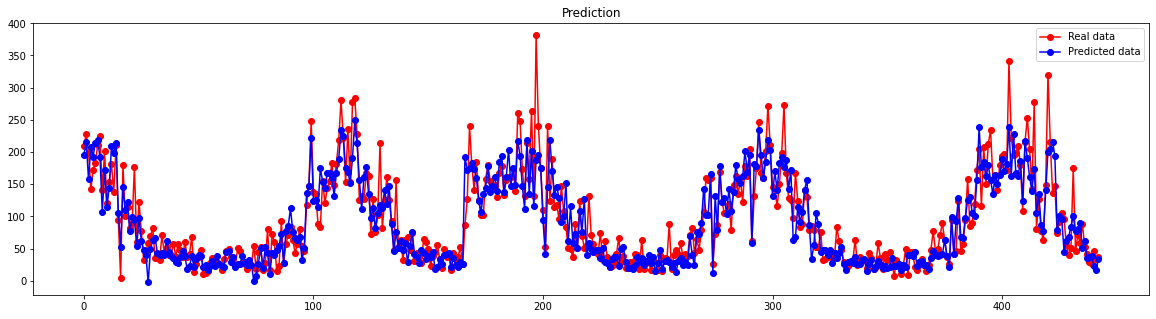

In [42]:
# Predicting and Finding R Squared Score
y_predict = model_nn.predict(sc.transform(X_test))
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, y_predict))) 

plt.figure(figsize=(20,5))
plt.plot(list(y_test) ,color = 'red', label = 'Real data',marker='o')
plt.plot(y_predict, color = 'blue', label = 'Predicted data',marker='o')
plt.title('Prediction')
plt.legend()
plt.show()

# Algorithms; ML Part

1. Using Xgboost Regressor

In [43]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds = 50,
        verbose = False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

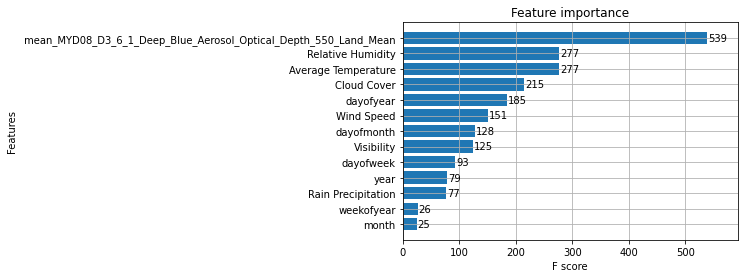

In [44]:
plot_importance(reg, height=0.8);

In [45]:
test['PM2.5 Prediction-Xgboost'] = reg.predict(X_test)

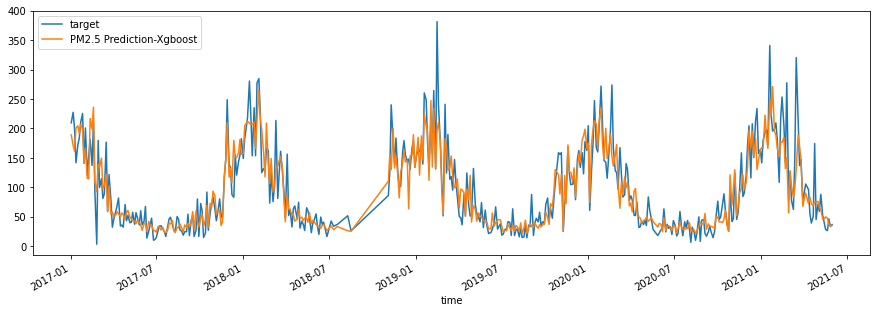

In [46]:
test[['target', 'PM2.5 Prediction-Xgboost']].plot(figsize=(15,5));

In [47]:
# The MAPE (Mean Absolute Percent Error) measures the size of the error
# in percentage terms.
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [48]:
# Make predictions using the training and testing set
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [49]:
print('R^2   train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

print('MSE   train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))

print('RMSE  train: %.2f, test: %.2f' %
      (np.sqrt(mean_squared_error(y_train, y_train_pred)),
       np.sqrt(mean_squared_error(y_test, y_test_pred))))

print('MAE   train: %.2f, test: %.2f' %
      (mean_absolute_error(y_train, y_train_pred),
       mean_absolute_error(y_test, y_test_pred)))

print('MAPE  train: %.2f, test: %.2f' %
      (mean_absolute_percentage_error(y_train, y_train_pred),
       mean_absolute_percentage_error(y_test, y_test_pred)))

R^2   train: 0.96, test: 0.80
MSE   train: 184.96, test: 958.82
RMSE  train: 13.60, test: 30.96
MAE   train: 9.96, test: 20.55
MAPE  train: 18.03, test: 33.82


# Using Random Forest

In [50]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=1500,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

In [51]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=7,
                      n_estimators=1500)

In [52]:
# Make predictions using the training and testing set
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)


In [53]:
print('R^2   train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

print('MSE   train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))

print('RMSE  train: %.2f, test: %.2f' %
      (np.sqrt(mean_squared_error(y_train, y_train_pred)),
       np.sqrt(mean_squared_error(y_test, y_test_pred))))

print('MAE   train: %.2f, test: %.2f' %
      (mean_absolute_error(y_train, y_train_pred),
       mean_absolute_error(y_test, y_test_pred)))

print('MAPE  train: %.2f, test: %.2f' %
      (mean_absolute_percentage_error(y_train, y_train_pred),
       mean_absolute_percentage_error(y_test, y_test_pred)))

R^2   train: 0.92, test: 0.81
MSE   train: 373.46, test: 915.24
RMSE  train: 19.33, test: 30.25
MAE   train: 13.75, test: 20.15
MAPE  train: 24.49, test: 36.47


In [54]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(X_train, y_train)))
print('Score on test data: {}\n'.format(forest.score(X_test, y_test)))

forest_pred = forest.predict(X_test)
forest_mse = mean_squared_error(y_test,forest_pred)
forest_accuracy = r2_score(y_test,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.9177704888043845

Score on test data: 0.8118826909778877

Root Mean Squared Error: 30.252944841908207

Overall model accuracy: 0.8118826909778877


In [55]:
test['PM2.5 Prediction-Random_Forest'] = forest.predict(X_test)

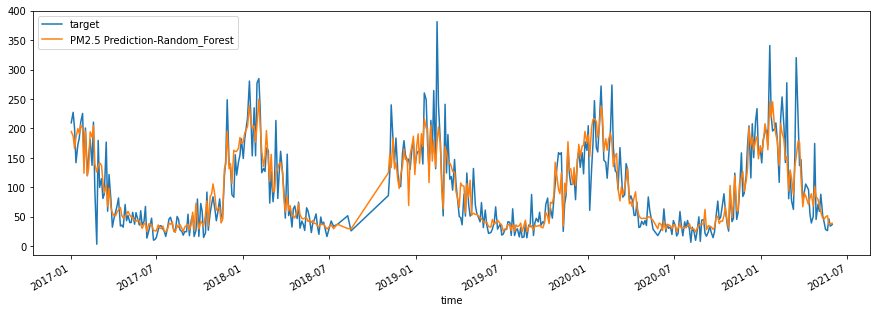

In [56]:
test[['target', 'PM2.5 Prediction-Random_Forest']].plot(figsize=(15,5));

# Using GradientBoostingRegressor

In [57]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=1000,
                                      max_depth=5,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7, n_estimators=1000)

In [58]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(X_train, y_train)))
print('Score on test data: {}\n'.format(grad_boost.score(X_test, y_test)))

gboost_pred = grad_boost.predict(X_test)
gboost_mse = mean_squared_error(y_test,gboost_pred)
gboost_accuracy = r2_score(y_test,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9999895766076004

Score on test data: 0.8001748232723392

Root Mean Squared Error: 31.180162885374678

Overall model accuracy: 0.8001748232723392


In [59]:
# Make predictions using the training and testing set
y_train_pred = grad_boost.predict(X_train)
y_test_pred = grad_boost.predict(X_test)

In [60]:
print('R^2   train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

print('MSE   train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))

print('RMSE  train: %.2f, test: %.2f' %
      (np.sqrt(mean_squared_error(y_train, y_train_pred)),
       np.sqrt(mean_squared_error(y_test, y_test_pred))))

print('MAE   train: %.2f, test: %.2f' %
      (mean_absolute_error(y_train, y_train_pred),
       mean_absolute_error(y_test, y_test_pred)))

print('MAPE  train: %.2f, test: %.2f' %
      (mean_absolute_percentage_error(y_train, y_train_pred),
       mean_absolute_percentage_error(y_test, y_test_pred)))

R^2   train: 1.00, test: 0.80
MSE   train: 0.05, test: 972.20
RMSE  train: 0.22, test: 31.18
MAE   train: 0.15, test: 21.21
MAPE  train: 0.31, test: 31.88


In [61]:
test['PM2.5 Prediction-grad_boost'] = grad_boost.predict(X_test)

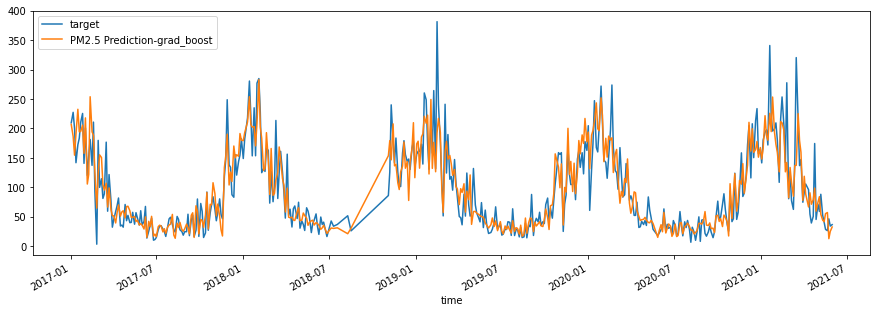

In [62]:
test[['target', 'PM2.5 Prediction-grad_boost']].plot(figsize=(15,5));

# Using CatBoostRegressor 

In [63]:
cb_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.03,
                             depth=7,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

In [64]:
cb_model.fit(X_train, y_train)

0:	learn: 65.9643522	total: 51ms	remaining: 25.4s
50:	learn: 32.4240023	total: 213ms	remaining: 1.88s
100:	learn: 25.3142580	total: 382ms	remaining: 1.51s
150:	learn: 22.5183117	total: 547ms	remaining: 1.26s
200:	learn: 20.8044102	total: 711ms	remaining: 1.06s
250:	learn: 19.3046912	total: 875ms	remaining: 868ms
300:	learn: 17.9426509	total: 1.04s	remaining: 690ms
350:	learn: 17.0377433	total: 1.21s	remaining: 515ms
400:	learn: 16.2637374	total: 1.41s	remaining: 347ms
450:	learn: 15.3053914	total: 1.71s	remaining: 186ms
499:	learn: 14.4523188	total: 2.11s	remaining: 0us


In [65]:
# we now score the model
print('Score on train data: {}\n'.format(cb_model.score(X_train, y_train)))
print('Score on test data: {}\n'.format(cb_model.score(X_test, y_test)))

cb_model_pred = cb_model.predict(X_test)
cb_model_mse = mean_squared_error(y_test,cb_model_pred)
cb_model_accuracy = r2_score(y_test,cb_model_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(cb_model_mse)))
print('Overall model accuracy: {}'.format(cb_model_accuracy))

Score on train data: 0.9540110157313479

Score on test data: 0.8222912673814772

Root Mean Squared Error: 29.404084459939522

Overall model accuracy: 0.8222912673814772


In [66]:
# Make predictions using the training and testing set
y_train_pred = cb_model.predict(X_train)
y_test_pred = cb_model.predict(X_test)

In [67]:
print('R^2   train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

print('MSE   train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))

print('RMSE  train: %.2f, test: %.2f' %
      (np.sqrt(mean_squared_error(y_train, y_train_pred)),
       np.sqrt(mean_squared_error(y_test, y_test_pred))))

print('MAE   train: %.2f, test: %.2f' %
      (mean_absolute_error(y_train, y_train_pred),
       mean_absolute_error(y_test, y_test_pred)))

print('MAPE  train: %.2f, test: %.2f' %
      (mean_absolute_percentage_error(y_train, y_train_pred),
       mean_absolute_percentage_error(y_test, y_test_pred)))

R^2   train: 0.95, test: 0.82
MSE   train: 208.87, test: 864.60
RMSE  train: 14.45, test: 29.40
MAE   train: 10.89, test: 19.65
MAPE  train: 19.81, test: 31.56


In [68]:
test['PM2.5 Prediction-Cat_boost'] =cb_model.predict(X_test)

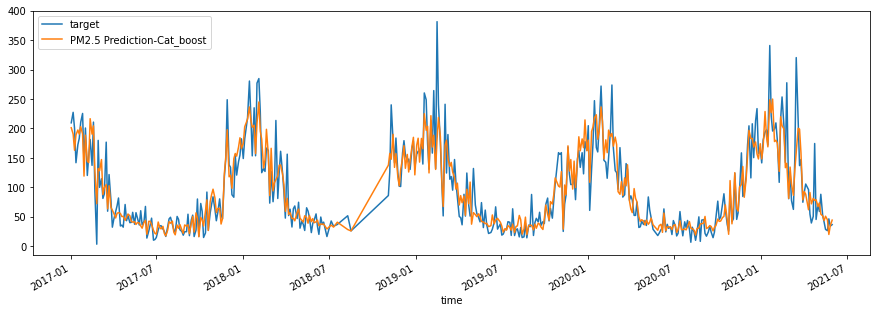

In [69]:
test[['target', 'PM2.5 Prediction-Cat_boost']].plot(figsize=(15,5));